In [2]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import random

In [14]:
def distance(matrix, i, j):
    return matrix[i][j] if matrix[i][j] != 0 else None

def neighbours(matrix, i):
    return [j for j in range(len(matrix)) if distance(matrix, i, j) is not None]

def dijkstra(matrix):
    distance_vector = [float("inf")] * len(matrix)
    distance_vector[0] = 0 
    visited = set()
    heap = [(0, 0)] 
    previous = [None] * len(matrix)

    while heap:
        current_dist, u = heapq.heappop(heap)

        if u in visited:
            continue
        visited.add(u)

        print(f"\nVisiting vertex {u}, current distance: {current_dist}")
        
        for v in neighbours(matrix, u):
            if v in visited:
                continue
            alt = current_dist + distance(matrix, u, v)
            if alt < distance_vector[v]:
                distance_vector[v] = alt
                previous[v] = u
                heapq.heappush(heap, (alt, v))
                print(f" --> Updated distance to vertex {v}: {alt}")
    
    print("\nShortest paths from node 0:")
    for target_node in range(len(matrix)):
        if distance_vector[target_node] == float('inf'):
            print(f"Node {target_node} is unreachable from node 0")
            continue

        path = []
        current = target_node
        while current is not None:
            path.append(current)
            current = previous[current]
        path.reverse()
        print(f"To node {target_node}: path = {path}, distance = {distance_vector[target_node]}")
    
    print("\nFinal shortest distances from source vertex 0:")
    print(distance_vector)

    return distance_vector

def random_graph(n, thresh, max_weight):
    matrix = [[0 if i == j or random.random() > thresh else random.randint(1, max_weight) for j in range(n)] for i in range(n)]
    matrix[0][random.randint(1, n-1)] = random.randint(1, max_weight) # first node has at least one connection
    edges = [(i, j, matrix[i][j]) for i in range(n) for j in range(n) if matrix[i][j] != 0]
    
    print("Adjacency Matrix:")
    for row in matrix:
        print(row)
    
    print("\nEdges with weights:")
    print(edges)
    return matrix

def print_graph(matrix):
    G = nx.MultiDiGraph()
    edges = [(i, j, matrix[i][j]) for i in range(len(matrix)) for j in range(len(matrix)) if matrix[i][j] != 0]
    G.add_weighted_edges_from(edges)
    labels = nx.get_edge_attributes(G, "weight")
    pos = nx.shell_layout(G)
    nx.draw(G, pos, with_labels=True, connectionstyle='arc3, rad = 0.2', node_size = 1000, node_color = 'red')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, connectionstyle='arc3, rad = 0.2')
    plt.show()

Adjacency Matrix:
[0, 0, 0, 0, 0, 0, 13, 0]
[2, 0, 2, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 6, 0, 0, 15, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 4, 0, 6, 0]

Edges with weights:
[(0, 6, 13), (1, 0, 2), (1, 2, 2), (4, 2, 6), (4, 5, 15), (7, 4, 4), (7, 6, 6)]


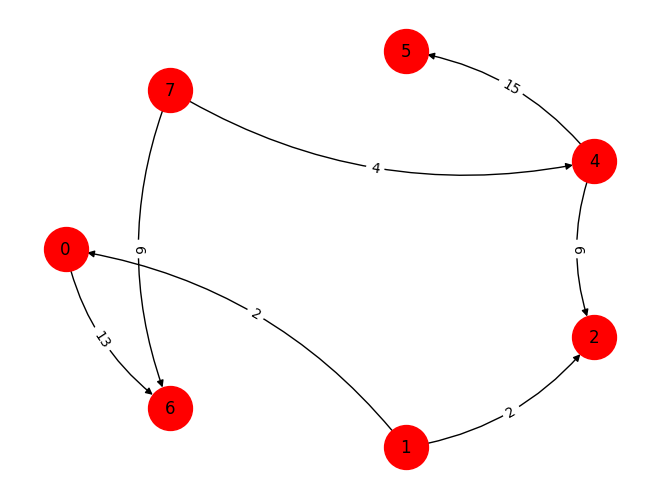

In [22]:
matrix = random_graph(8, .15, 15)
print_graph(matrix)


In [17]:
distance_vector = dijkstra(matrix)


Visiting vertex 0, current distance: 0
 --> Updated distance to vertex 5: 13

Visiting vertex 5, current distance: 13
 --> Updated distance to vertex 2: 18
 --> Updated distance to vertex 4: 19

Visiting vertex 2, current distance: 18

Visiting vertex 4, current distance: 19
 --> Updated distance to vertex 9: 34

Visiting vertex 9, current distance: 34

Shortest paths from node 0:
To node 0: path = [0], distance = 0
Node 1 is unreachable from node 0
To node 2: path = [0, 5, 2], distance = 18
Node 3 is unreachable from node 0
To node 4: path = [0, 5, 4], distance = 19
To node 5: path = [0, 5], distance = 13
Node 6 is unreachable from node 0
Node 7 is unreachable from node 0
Node 8 is unreachable from node 0
To node 9: path = [0, 5, 4, 9], distance = 34

Final shortest distances from source vertex 0:
[0, inf, 18, inf, 19, 13, inf, inf, inf, 34]


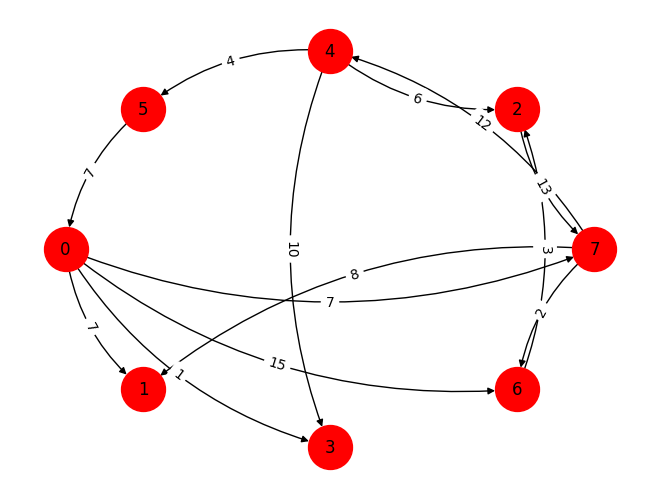

In [ ]:
# specific case

matrix_set = [[0, 7, 0, 1, 0, 0, 15, 7],
[0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 13],
[0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 6, 10, 0, 4, 0, 0],
[7, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 3, 0, 0, 0, 0, 0],
[0, 8, 0, 0, 12, 0, 2, 0]]

print_graph(matrix_set)

In [30]:
distance_vector = dijkstra(matrix_set)


Visiting vertex 0, current distance: 0
 --> Updated distance to vertex 1: 7
 --> Updated distance to vertex 3: 1
 --> Updated distance to vertex 6: 15
 --> Updated distance to vertex 7: 7

Visiting vertex 3, current distance: 1

Visiting vertex 1, current distance: 7

Visiting vertex 7, current distance: 7
 --> Updated distance to vertex 4: 19
 --> Updated distance to vertex 6: 9

Visiting vertex 6, current distance: 9
 --> Updated distance to vertex 2: 12

Visiting vertex 2, current distance: 12

Visiting vertex 4, current distance: 19
 --> Updated distance to vertex 5: 23

Visiting vertex 5, current distance: 23

Shortest paths from node 0:
To node 0: path = [0], distance = 0
To node 1: path = [0, 1], distance = 7
To node 2: path = [0, 7, 6, 2], distance = 12
To node 3: path = [0, 3], distance = 1
To node 4: path = [0, 7, 4], distance = 19
To node 5: path = [0, 7, 4, 5], distance = 23
To node 6: path = [0, 7, 6], distance = 9
To node 7: path = [0, 7], distance = 7

Final shortest di